# NNDL ASSIGNMENT-4
## MOCHARLA NISHANTH MAURYA
## 191EC226

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tqdm.notebook as tqdm
import pandas as pd
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, AvgPool2D
from tensorflow.keras.optimizers import Adam
from tqdm.keras import TqdmCallback
import cv2
from sklearn.model_selection import train_test_split

Q.1.(i) Write python code for plotting the following activation functions and their derivative  for the input x in the range of -20 to 20. 
(a)  ReLU (e) Lekay ReLU (c) Parametric ReLU  (d) Exponential ReLU(ELU)  (e) Scaled Exponential Linear Units (SELU)  (f) SoftPlus (Smooth ReLU)

(ii)Write python from scratch for 2D Linear convolution between input=np.array([[1,2,3],[4,5,6],[7,8,9]])and filter=np.array([[1,2,1],[0,0,0],[-1,-2,-1]]) (b).Write python from scratch for 2D Linear convolution by Toeplitz matrix method between input image(lena.jpg) and kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]]))/16 (c) Compute number of multiplications and parameters required for 2D Linear Convolution in part (a) and part(b) (d) Apply Max pooling and Average pooling on convoled image in part (b)

(iii) (a)Write python from scratch for 2D Spatial Separbale convolution between input image(lena.jpg) and Gausian filter = np.array([1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1])/256 (b) Compute number of multiplications and parameters required for2D Spatial Separbale convolution

(i)

In [ ]:
x = np.arange(-20,21)
def ReLU(x):
  data = [max(0,value) for value in x]
  return np.array(data, dtype=float)
def deri_ReLU(x):
  data = [1 if value>0 else 0 for value in x]
  return np.array(data, dtype=float)

In [ ]:
ReLU(x)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,
        6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18.,
       19., 20.])

In [ ]:
deri_ReLU(x)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [ ]:
def Leaky_ReLU(x):
  data = [0.01*value if value<0 else value for value in x]
  return np.array(data,dtype=float)
def deri_Leaky_ReLU(x):
  data = [1 if value>=0 else 0.01 for value in x]
  return np.array(data,dtype=float)

In [ ]:
Leaky_ReLU(x)

array([-2.0e-01, -1.9e-01, -1.8e-01, -1.7e-01, -1.6e-01, -1.5e-01,
       -1.4e-01, -1.3e-01, -1.2e-01, -1.1e-01, -1.0e-01, -9.0e-02,
       -8.0e-02, -7.0e-02, -6.0e-02, -5.0e-02, -4.0e-02, -3.0e-02,
       -2.0e-02, -1.0e-02,  0.0e+00,  1.0e+00,  2.0e+00,  3.0e+00,
        4.0e+00,  5.0e+00,  6.0e+00,  7.0e+00,  8.0e+00,  9.0e+00,
        1.0e+01,  1.1e+01,  1.2e+01,  1.3e+01,  1.4e+01,  1.5e+01,
        1.6e+01,  1.7e+01,  1.8e+01,  1.9e+01,  2.0e+01])

In [ ]:
deri_Leaky_ReLU(x)

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [ ]:
def para_ReLU(x,a):
  data = [a*value if value<0 else value for value in x]
  return np.array(data,dtype=float)
def deri_para_ReLU(x,a):
  data = [a if value<0 else 1 for value in x]
  return np.array(data,dtype=float)


In [ ]:
para_ReLU(x,0.1)

array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
       -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  1. ,
        2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. ,
       13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. ])

In [ ]:
deri_para_ReLU(x,0.1)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. ])

In [ ]:
def ELU(x,a=0.01):
  e=np.exp(1)
  data =  [a*(((e)**value)-1) if value <= 0 else value for value in x ]
  return np.array(data,dtype= float)
def deri_ELU(x,a=0.01):
  e = np.exp(1)
  data =  [a*(((e)**value)-1)+a if value <= 0 else 1 for value in x]
  return np.array(data,dtype=float)

In [ ]:
ELU(x)

array([-9.99999998e-03, -9.99999994e-03, -9.99999985e-03, -9.99999959e-03,
       -9.99999887e-03, -9.99999694e-03, -9.99999168e-03, -9.99997740e-03,
       -9.99993856e-03, -9.99983298e-03, -9.99954600e-03, -9.99876590e-03,
       -9.99664537e-03, -9.99088118e-03, -9.97521248e-03, -9.93262053e-03,
       -9.81684361e-03, -9.50212932e-03, -8.64664717e-03, -6.32120559e-03,
        0.00000000e+00,  1.00000000e+00,  2.00000000e+00,  3.00000000e+00,
        4.00000000e+00,  5.00000000e+00,  6.00000000e+00,  7.00000000e+00,
        8.00000000e+00,  9.00000000e+00,  1.00000000e+01,  1.10000000e+01,
        1.20000000e+01,  1.30000000e+01,  1.40000000e+01,  1.50000000e+01,
        1.60000000e+01,  1.70000000e+01,  1.80000000e+01,  1.90000000e+01,
        2.00000000e+01])

In [ ]:
deri_ELU(x)

array([2.06115350e-11, 5.60279653e-11, 1.52299798e-10, 4.13993772e-10,
       1.12535175e-09, 3.05902320e-09, 8.31528719e-09, 2.26032941e-08,
       6.14421235e-08, 1.67017008e-07, 4.53999298e-07, 1.23409804e-06,
       3.35462628e-06, 9.11881966e-06, 2.47875218e-05, 6.73794700e-05,
       1.83156389e-04, 4.97870684e-04, 1.35335283e-03, 3.67879441e-03,
       1.00000000e-02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00])

In [ ]:
def SELU(x,a=0.01,l=1.05):
  e=np.exp(1)
  data =  [l*a*(((e)**value)-1) if value <= 0 else l*value for value in x ]
  return np.array(data,dtype= float)
def deri_SELU(x,a=0.01,l=1.05):
  e = np.exp(1)
  data =  [l*a*(((e)**value)-1)+a if value <= 0 else l for value in x]
  return np.array(data,dtype=float)

In [ ]:
SELU(x)

array([-1.05000000e-02, -1.04999999e-02, -1.04999998e-02, -1.04999996e-02,
       -1.04999988e-02, -1.04999968e-02, -1.04999913e-02, -1.04999763e-02,
       -1.04999355e-02, -1.04998246e-02, -1.04995233e-02, -1.04987042e-02,
       -1.04964776e-02, -1.04904252e-02, -1.04739731e-02, -1.04292516e-02,
       -1.03076858e-02, -9.97723578e-03, -9.07897953e-03, -6.63726587e-03,
        0.00000000e+00,  1.05000000e+00,  2.10000000e+00,  3.15000000e+00,
        4.20000000e+00,  5.25000000e+00,  6.30000000e+00,  7.35000000e+00,
        8.40000000e+00,  9.45000000e+00,  1.05000000e+01,  1.15500000e+01,
        1.26000000e+01,  1.36500000e+01,  1.47000000e+01,  1.57500000e+01,
        1.68000000e+01,  1.78500000e+01,  1.89000000e+01,  1.99500000e+01,
        2.10000000e+01])

In [ ]:
deri_SELU(x)

array([-4.99999978e-04, -4.99999941e-04, -4.99999840e-04, -4.99999565e-04,
       -4.99998818e-04, -4.99996788e-04, -4.99991269e-04, -4.99976267e-04,
       -4.99935486e-04, -4.99824632e-04, -4.99523301e-04, -4.98704197e-04,
       -4.96477642e-04, -4.90425239e-04, -4.73973102e-04, -4.29251557e-04,
       -3.07685792e-04,  2.27642179e-05,  9.21020474e-04,  3.36273413e-03,
        1.00000000e-02,  1.05000000e+00,  1.05000000e+00,  1.05000000e+00,
        1.05000000e+00,  1.05000000e+00,  1.05000000e+00,  1.05000000e+00,
        1.05000000e+00,  1.05000000e+00,  1.05000000e+00,  1.05000000e+00,
        1.05000000e+00,  1.05000000e+00,  1.05000000e+00,  1.05000000e+00,
        1.05000000e+00,  1.05000000e+00,  1.05000000e+00,  1.05000000e+00,
        1.05000000e+00])

In [ ]:
def SoftPlus(x):
  e = np.exp(1)
  return np.log(1+((e)**x))
def deri_SoftPlus(x):
  e = np.exp(1)
  return 1/(1+((e)**-x))

In [ ]:
SoftPlus(x)

array([2.06115369e-09, 5.60279643e-09, 1.52299796e-08, 4.13993764e-08,
       1.12535168e-07, 3.05902274e-07, 8.31528373e-07, 2.26032685e-06,
       6.14419348e-06, 1.67015613e-05, 4.53988992e-05, 1.23402190e-04,
       3.35406373e-04, 9.11466454e-04, 2.47568514e-03, 6.71534849e-03,
       1.81499279e-02, 4.85873516e-02, 1.26928011e-01, 3.13261688e-01,
       6.93147181e-01, 1.31326169e+00, 2.12692801e+00, 3.04858735e+00,
       4.01814993e+00, 5.00671535e+00, 6.00247569e+00, 7.00091147e+00,
       8.00033541e+00, 9.00012340e+00, 1.00000454e+01, 1.10000167e+01,
       1.20000061e+01, 1.30000023e+01, 1.40000008e+01, 1.50000003e+01,
       1.60000001e+01, 1.70000000e+01, 1.80000000e+01, 1.90000000e+01,
       2.00000000e+01])

In [ ]:
deri_SoftPlus(x)

array([2.06115362e-09, 5.60279641e-09, 1.52299795e-08, 4.13993755e-08,
       1.12535162e-07, 3.05902227e-07, 8.31528028e-07, 2.26032430e-06,
       6.14417460e-06, 1.67014218e-05, 4.53978687e-05, 1.23394576e-04,
       3.35350130e-04, 9.11051194e-04, 2.47262316e-03, 6.69285092e-03,
       1.79862100e-02, 4.74258732e-02, 1.19202922e-01, 2.68941421e-01,
       5.00000000e-01, 7.31058579e-01, 8.80797078e-01, 9.52574127e-01,
       9.82013790e-01, 9.93307149e-01, 9.97527377e-01, 9.99088949e-01,
       9.99664650e-01, 9.99876605e-01, 9.99954602e-01, 9.99983299e-01,
       9.99993856e-01, 9.99997740e-01, 9.99999168e-01, 9.99999694e-01,
       9.99999887e-01, 9.99999959e-01, 9.99999985e-01, 9.99999994e-01,
       9.99999998e-01])

(ii)

In [ ]:
def convolve(Image,kernel,padding = (0,0),s = 1):
    
    kernel = np.flipud(np.fliplr(kernel))
    p1,p2 = padding
    
    x,y = Image.shape

    x_k,y_k = kernel.shape

    out_x = (x-x_k+2*p1)//s+1
    out_y = (y-y_k+2*p2)//s+1
    
    out = np.zeros((out_x,out_y))
    
    Img_padded = np.zeros((x+2*p1,y+2*p2))
    Img_padded[p1:p1+x,p2:p2+y] = Image
    Image = Img_padded
    
    for i in range(out_x):
        i_img = i*s
        for j in range(out_y):
            j_img = j*s
            out[i,j] = np.sum(Image[i_img:i_img+x_k,j_img:j_img+y_k]*kernel)
            
    print("Convolution:\n",out)
    print("\nTotal number of multiplications is: ",(out_x*out_y*x_k*y_k))
    
    return out
  

In [ ]:
#Solution for part 1.(ii).(a)

Image = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("Image:\n",Image)

kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print("Kernel:\n",kernel)

convolved = convolve(Image,kernel,(1,1))

Image:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Kernel:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]
Convolution:
 [[ 13.  20.  17.]
 [ 18.  24.  18.]
 [-13. -20. -17.]]

Total number of multiplications is:  81


In [ ]:
#Functions for part 1.(ii).(b) and 1.(ii).(c)
def rightrotate(arr):
    l = len(arr)
    y = arr[l-1]
    for n in range(l-1,-1,-1):
        arr[n] = arr[n-1]
    arr[n] = y
    return arr

def convolve2dmatrix(input,kernel):
    r1 = np.shape(input)[0]
    c1 = np.shape(input)[1]
    r2 = np.shape(kernel)[0]
    c2 = np.shape(kernel)[1]

    #dimensions of output
    r3 = r1+r2-1
    c3 = c1+c1-1

    #zero padding kernel
    kernel = np.pad(kernel,((0,r3-r2),(0,c3-c2)), 'constant')

    #Creating toeplitz submatrices
    mylist = []
    for i in range(r3):
        x = kernel[i]
        for j in range(c1):
            if (j==0):
                temp = np.array([x])
            else:
                x = rightrotate(x)
                temp = np.vstack((temp,x))
        mylist.append(temp)
  
    #Creating the Blocked Toeplitz matrix
    #soft coded for general case
    templist = mylist
    length = len(templist)
    for j in tqdm.tqdm(range(c1),leave=False,desc = "Convolution progress"):
        if (j==0):
            for k in range(length):
                if (k==0):
                    H = np.block([templist[0]])
                else:
                    H = np.block([H,templist[k]])
            Hfinal = np.block(H)
        else:
            templist = rightrotate(templist)
            for k in range(length):
                if (k==0):
                    H = np.block([templist[0]])
                else:
                    H = np.block([H,templist[k]])
            Hfinal = np.block([[Hfinal],[H]])
    Hfinal = np.transpose(Hfinal)

    #reshape input matrix
    input = np.reshape(input,r1*c1)

    #multiply both
    result_vector = np.matmul(Hfinal, input)

    #reshape output vector
    result_vector = np.reshape(result_vector,(r3,c3))
    
    crop = result_vector[0:102, 0:102]
    plt.imshow(crop,cmap='gray')
    plt.title("Convolved Image:")
    plt.show()
    print("")
    
    return crop
    
def computemultiplications(img,kernel):
    Dfr = np.shape(img)[0]
    Dfc = np.shape(img)[1]
    Dkr = np.shape(kernel)[0]
    Dkc = np.shape(kernel)[1]

    #dimensions of output
    Dpr = Dfr+Dkr-1
    Dpc = Dfc+Dkc-1

    total = (Dkr**2)*(Dpr**2)
    return total

In [ ]:
import cv2

In [ ]:
from google.colab import files
files.upload()

Saving Lena.jpg to Lena.jpg


{'Lena.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\n\x07\x08\x16\x16\x15\x18\x16\x16\x15\x18\x19\x18\x1a\x1c\x1c\x1e\x1c\x1c\x1a\x1a!\x18\x18\x1c\x1c\x1a\x1a\x1a\x1a\x1c\x1c\x1a\x1c\x1c!.%!\x1e+!\x1c\x18&8&+/1555\x1a$;@;4?.451\x01\x0c\x0c\x0c\x10\x0f\x10\x1f\x12\x12\x1e4+%+44444444444444444444444444444444444444444444444444\xff\xc0\x00\x11\x08\x00\xe1\x00\xe1\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x06\x02\x03\x04\x00\x01\x07\x08\xff\xc4\x00B\x10\x00\x02\x01\x02\x04\x03\x05\x05\x06\x04\x03\x08\x03\x01\x00\x00\x01\x02\x00\x03\x11\x04\x12!1\x05AQ\x06"aq\x81\x132\x91\xa1\xc1BRb\xb1\xd1\xf0\x14#r\x823\x92\xe1\x07\x15$Sc\xa2\xc2\xf14s\xb3\x16\xff\xc4\x00\x1a\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x01\x00\x05\x06\xff\xc4\x00*\x11\x00\x02\x02\x01\x03\x04\x02\x01\x03\x05\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03\x12!

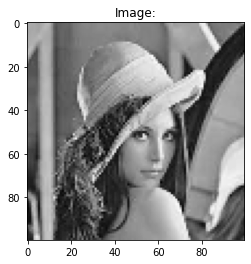

Kernel:
 [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]



Convolution progress:   0%|          | 0/100 [00:00<?, ?it/s]

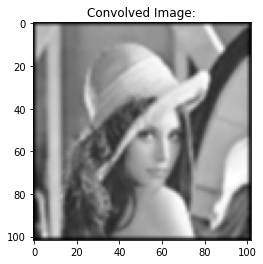


The total number of multiplications are: 93636


In [ ]:
#Solution for part 1.(ii).(b) and 1.(ii).(c)

input2 = cv2.imread('/content/Lena.jpg',0)
input2 = cv2.resize(input2,(100,100))
kernel2 = np.array([[1,2,1],[2,4,2],[1,2,1]])
kernel2 = kernel2/16

plt.imshow(input2,cmap='gray')
plt.title("Image:")
plt.show()
print("Kernel:\n",kernel2)
print("")

#Converting image to numpy array
input2 = np.array(input2)

#Calling Convolve2dmatrix
convolved = convolve2dmatrix(input2,kernel2)

#Compute Multiplications
print("The total number of multiplications are:",computemultiplications(input2,kernel2))
 

In [ ]:
#Functions for part 1.(ii).(d)

def Max_pooling(Image,kernel_size):
    
    x,y = Image.shape

    x_k,y_k = kernel_size

    out_x = (x-x_k)+1
    out_y = (y-y_k)+1
    
    out = np.zeros((out_x,out_y))
        
    for i in range(out_x):
        for j in range(out_y):
            out[i,j] = np.max(Image[i:i+x_k,j:j+y_k])
            
    plt.imshow(out,cmap='gray')
    plt.title("Max_pooled Image:")
    plt.show()        
    
#Functions for part (d)

def Average_pooling(Image,kernel_size):
    
    x,y = Image.shape

    x_k,y_k = kernel_size

    out_x = (x-x_k)+1
    out_y = (y-y_k)+1
    
    out = np.zeros((out_x,out_y))
        
    for i in range(out_x):
        for j in range(out_y):
            out[i,j] = np.mean(Image[i:i+x_k,j:j+y_k])
            
    plt.imshow(out,cmap='gray')
    plt.title("Average_pooled Image:")
    plt.show()    

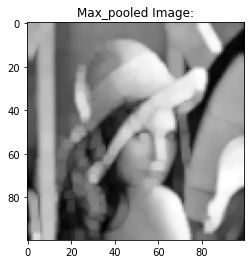

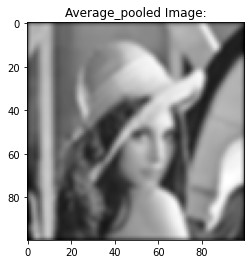

In [ ]:
#Solution for part 1.(ii).(d)

Max_pooling(convolved,(3,3))
Average_pooling(convolved,(3,3))

(iii)

Text(0.5, 1.0, 'Input Image')

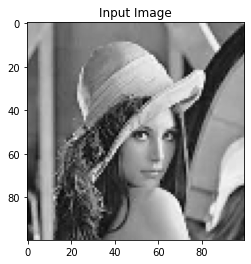

In [ ]:
#Define Inputs
Image = cv2.imread('/content/Lena.jpg',0) #Image
Image = cv2.resize(Image,(100,100)) 
Image = np.array(Image)

plt.imshow(Image,cmap='gray')
plt.title("Input Image")

In [ ]:
filter1 = np.array([[1,4,6,4,1]])
filter2 = np.reshape(filter1,(5,1)) #Column filter

Convolution:
 [[2490. 2481. 2472. ... 1366. 1024.  912.]
 [2466. 2471. 2476. ...  945.  732.  749.]
 [2451. 2471. 2492. ...  717.  655.  764.]
 ...
 [1002. 1469. 1773. ... 1086.  945.  908.]
 [ 857. 1239. 1505. ...  956.  896.  859.]
 [ 804.  994. 1200. ...  872.  865.  918.]]

Total number of multiplications is:  48000


Text(0.5, 1.0, 'Intermediate Image')

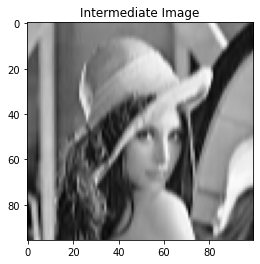

In [ ]:
inter_image = convolve(Image,filter2) #Intermediate Image
plt.imshow(inter_image,cmap='gray')
plt.title("Intermediate Image")

Convolution:
 [[39608. 39419. 39180. ... 30266. 27233. 22454.]
 [39591. 39498. 39363. ... 27402. 22274. 16889.]
 [39722. 39744. 39787. ... 22499. 16943. 13088.]
 ...
 [30778. 37381. 38530. ... 24534. 22267. 18687.]
 [28019. 36279. 39195. ... 24392. 20802. 17026.]
 [25588. 36172. 41296. ... 22895. 18638. 15492.]]

Total number of multiplications is:  46080


Text(0.5, 1.0, 'Final Image')

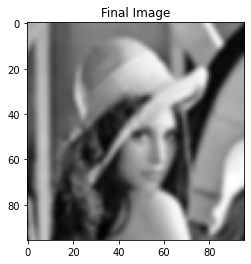

In [ ]:
final_image = convolve(inter_image,filter1) #final Output

plt.imshow(final_image,cmap='gray')
plt.title("Final Image")

Q. 2. Build a CNN(LeNet5) model from scratch (using Numpy)  to  recognize  handwritten digit from the optical handwritten digit dataset (Use Sklearn Dataset and  split dataset into training dataset (80%) and  testing dataset (20%) ). Use a Stochastic gradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of the CNN model for   (a)  Softmax loss function (b) Focal loss function.  
 (i)  Plot a comparative loss curve for at least 50 epochs.
(ii) Print confusion matrix, calculate classification metrics such as precision, recall, f1-score and accuracy on test datset and ROC curve for each loss function.
(iii)  Repeat part (i) to (ii) using an Adam gradient descent algorithm
(iv)  Implement above CNN model with Keras/Tensorflow/Pytorch Library and verify the above results. 

In [ ]:
#Function for debugging
def check_nan(Layer_name,**variables):
    if any(np.isnan(val).any() for val in variables.values()):
        print("************* nan detected at {}! *************\n".format(layer_name))
        for key,value in variables.items():
            print("Variable ",key,":")
            print(value,"\n")

## Required layers

# Conv2D
class conv2d_layer:
    def __init__(self,shape,n,anything_else = None):
        self.w = np.random.rand(n,shape[0],shape[1],shape[2])/(np.product(shape)+1)
        self.b = np.random.rand(n)/(np.product(shape)+1)
        self.n = n
        
    def forward(self,Image):    
        
        if(len(Image.shape)==2):
            Image=np.reshape(Image,(1,Image.shape[0],Image.shape[1]))
            
        x,y = Image[0].shape

        _ , x_k , y_k = self.w[0].shape

        out_x = x-x_k+1
        out_y = y-y_k+1
        
        output = []
        
        for pos in range(self.n):
            out = np.zeros((out_x,out_y))
            
            for i in range(out_x):
                for j in range(out_y):
                    out[i,j] = np.sum(Image[:,i:i+x_k,j:j+y_k]*self.w[pos]) + self.b[pos]
            output = output + [out]
        output = np.array(output)      
        
        return output
    
    def reverse(self,Image,Errors):
        
        if(len(Image.shape)==2):
            Image=np.reshape(Image,(1,Image.shape[0],Image.shape[1]))
            
        x,y = Image[0].shape
        _ ,x_k,y_k = self.w[0].shape
        err_x,err_y = Errors[0].shape
        
        output = np.zeros_like(Image,Errors.dtype)
        for layer in range(self.n):
            for i in range(err_x):
                for j in range(err_y):
                    output[:,i:i+x_k,j:j+y_k] += Errors[layer,i,j]*self.w[layer]
                    self.w[layer] = self.w[layer] - Errors[layer,i,j]*Image[:,i:i+x_k,j:j+y_k]
                    self.b[layer] = self.b[layer] - Errors[layer,i,j]
                
        
        return output
    
    def display(self):
        print("\n**********Convolution Parameters**********")
        print("Weights are:\n", self.w)
        print("Bias is:\n ", self.b)
        print("#Kernels is:\n ", self.n)
        
# tanh
class tanh:
    
    def forward(self,Input):
        exp = np.exp(-2*Input)
        output = (1-exp)/(1+exp)
            
        return output
    
    def reverse(self,Input,Errors):
        der = 1-np.square(self.forward(Input))
        output = der*Errors
        
        return output
    
# AveragePooling2D
class AveragePooling2D:
    
    def __init__(self,shape,stride,anything_else = None):
        self.shape = shape
        self.stride = stride
        
    def forward(self,Image):  
        if(len(Image.shape)==2):
            Image=np.reshape(Image,(1,Image.shape[0],Image.shape[1]))
            
        x,y = Image[0].shape
        s=self.stride
        x_k,y_k = self.shape
        
        out_x = (x-x_k)//s+1
        out_y = (y-y_k)//s+1

        output = []
        for pos in range(Image.shape[0]):
            
            out = np.zeros((out_x,out_y))

            for i in range(out_x):
                for j in range(out_y):
                    out[i,j] = np.mean(Image[0][i*s:i*s+x_k,j*s:j*s+y_k])
            output = output + [out]
            
        output = np.array(output)
        
        return output
    
    def reverse(self,Image,Errors):
        if(len(Image.shape)==2):
            Image=np.reshape(Image,(1,Image.shape[0],Image.shape[1]))
        
        x,y = Image[0].shape
        x_k,y_k = self.shape
        err_x,err_y = Errors[0].shape
            
        output = []
        for pos in range(Image.shape[0]):

            out = np.zeros_like(Image[pos],Errors.dtype)

            for i in range(err_x):
                for j in range(err_y):
                    out[i:i+x_k,j:j+y_k] += Errors[pos,i,j]/(x_k*y_k)
            output = output + [out]
        output = np.array(output)
        return output
    
# Flatten
class flatten():
    
    def forward(self,Image):
        output = np.reshape(Image,np.product(Image.shape))
        return output
    
    def reverse(self,Image,errors):
        output = np.reshape(errors,Image.shape)
        return output

# Dense
class fully_connected():
    def __init__(self,input_size,n):
        
        self.w = np.random.rand(n,input_size)/(input_size+1)
        self.b = np.random.rand(n)/(input_size+1)
        self.n = n
    
    def forward(self,Input):
        output = []
        for layer in range(self.n):
            out = np.dot(Input,self.w[layer]) + self.b[layer]
            output = output + [out]
        output = np.array(output)
        return output
    
    def reverse(self,Input,errors):
        
        output = np.zeros_like(Input)
        for layer in range(self.n):
            self.w[layer] = self.w[layer] - errors[layer]*Input
            self.b[layer] = self.b[layer] - errors[layer]
            output = output + errors[layer]*self.w[layer]   
        output = np.array(output)
        return output
    
# softmax
class softmax():
    
    def forward(self,Input):

        Numerator = np.exp(Input)
        output = Numerator/sum(Numerator)
        
        return (output)
    
    def reverse(self,Input,errors):
            
        Soft = self.forward(Input)
        
        Soft_list = np.array([list(Soft)] * len(Soft))
        derivative = Soft_list.T*(np.identity(len(Soft)) - Soft_list)
        
        output = np.matmul(errors,derivative)
        
        return output

def SoftmaxLoss(truth,predicted):
    
    loss = -1* np.sum(truth*np.log(predicted))
    
    Numerator = np.exp(predicted)
    softmax = Numerator/sum(Numerator)
        
    grad = softmax
    grad[truth == 1] = softmax[truth == 1] - 1
    
    return (loss,grad)
# Must work for both adam as well as SGD algos

In [ ]:
temp =  conv2d_layer((2,5,5),2)
Img = np.array([
    [
    [1,2,3,3,2],
    [1,3,5,2,3],
    [2,5,3,1,2],
    [3,1,2,1,2],
    [5,2,4,3,1]],
    [
    [1,2,3,3,2],
    [1,3,5,2,3],
    [2,5,3,1,2],
    [3,1,2,1,2],
    [5,2,4,3,1]]
])

temp.forward(Img)

array([[[1.20253546]],

       [[1.46018215]]])

In [ ]:
Model = [] #Input = 1*32*32

#Layer 0
Model = Model + [conv2d_layer((1,5,5),6)] #Out = 6*28*28

#Layer 1
Model = Model + [tanh()] #Out = 6*28*28

#Layer 2
Model = Model + [AveragePooling2D((2,2),2)] # Out = 6*14*14

#Layer 3
Model = Model + [conv2d_layer((6,5,5),16)] #Out = 16*10*10

#Layer 4
Model = Model + [tanh()] #Out = 16*10*10

#Layer 5
Model = Model + [AveragePooling2D((2,2),2)]# Out = 16*5*5

#Layer 6
Model = Model + [conv2d_layer((16,5,5),120)] #Out = 120*1*1

#Layer 7
Model = Model + [tanh()] #Out = 120*1*1

#Layer 8
Model = Model + [flatten()] #Out = 120

#Layer 9
Model = Model + [fully_connected(120,84)] #Out = 84

#Layer 10
Model = Model + [tanh()] #Out = 84

#Layer 11
Model = Model + [fully_connected(84,10)] #Out = 10

#Layer 12
Model = Model + [softmax()] #Out = 10

In [ ]:
### Read dataset
from sklearn.datasets import load_digits
data = load_digits()
list(data.target_names)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
from sklearn.model_selection import train_test_split
x = data['images']/16
y = data['target']
col_names = data['target_names']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size =0.2)

In [ ]:
epochs = 5
Recorded_loss = []
Learning_rate = 0.01

x_train = x_train[:50]
y_train = y_train[:50]

n_layers = len(Model)
for ep in tqdm.tqdm(range(epochs),leave=True,desc = "Epochs"):
    
    Data = tqdm.tqdm(zip(x_train,y_train),total = len(y_train),leave=False,desc = "Images")
    
    for Input_img,truth in Data:
        
        truth_onehot = np.array([0]*10)
        truth_onehot[truth] = 1
        
        outputs = [cv2.resize(Input_img,(32,32))]

        for i in range(n_layers):
            out = Model[i].forward(outputs[-1])
            outputs += [out.copy()]
            
    
        Loss, error = SoftmaxLoss(truth_onehot,outputs[-1])
        error = error * Learning_rate
        Recorded_loss += [Loss] 
        
        Data.set_description("Current loss is: {}".format(np.round(Loss,5)))
        Data.refresh()
        
        error = [error]
        for i in range(n_layers-1,-1,-1):
            out = Model[i].reverse(outputs[i],error[-1])
            error += [out.copy()]
    
    Data.set_description("Completed")
    Data.refresh()

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Images:   0%|          | 0/50 [00:00<?, ?it/s]

Images:   0%|          | 0/50 [00:00<?, ?it/s]

Images:   0%|          | 0/50 [00:00<?, ?it/s]

Images:   0%|          | 0/50 [00:00<?, ?it/s]

Images:   0%|          | 0/50 [00:00<?, ?it/s]

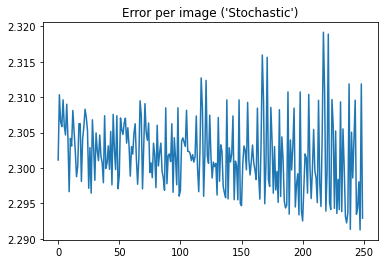

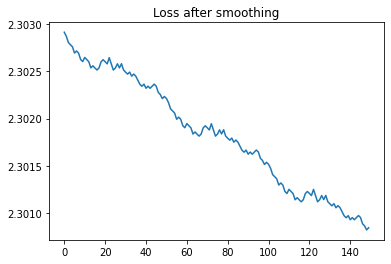

In [ ]:
plt.plot(Recorded_loss)
plt.title("Error per image ('Stochastic')")

val = 100
Avg_loss = []
for i in range(len(Recorded_loss)-val):
    Avg_loss +=  [np.mean(Recorded_loss[i:i+val])]

plt.figure()
plt.title("Loss after smoothing")
plt.plot(Avg_loss)

In [ ]:
#Display confusion Matrix

prediction = []
test_set = x_test[0:50]

for Input_img in tqdm.tqdm(test_set,total = len(test_set)):
    outputs = [cv2.resize(Input_img,(32,32))]
    for i in range(n_layers):
        out = Model[i].forward(outputs[-1])
        outputs += [out.copy()]
    prediction += [np.argmax(out)]
    
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(prediction, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

  0%|          | 0/50 [00:00<?, ?it/s]

Predicted,7
Actual,
0,4
1,6
2,5
3,8
4,2
5,2
6,5
7,9
8,3


Keras Implementation

In [ ]:
size = (32, 32)
x_train = np.array([cv2.resize(x_train[i],size) for i in range(x_train.shape[0])])
x_train = np.reshape(x_train, (len(x_train), 32, 32, 1))
x_test = np.array([cv2.resize(x_test[i],size) for i in range(x_test.shape[0])])
x_test = np.reshape(x_test, (len(x_test), 32, 32, 1))

In [ ]:
y_train = pd.get_dummies(y_train).values
y_test_val = pd.get_dummies(y_test).values

In [ ]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='tanh', input_shape=(32, 32, 1)))
model.add(AvgPool2D(strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(AvgPool2D(strides=2))
model.add(Conv2D(filters=120, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [ ]:
adam = Adam(learning_rate=5e-4)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)

In [ ]:
model.fit(x= x_train,y= y_train, batch_size=1, epochs=epochs, verbose=0,callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [ ]:
predicted = model.predict(x_test)
prediction = np.argmax(predicted, axis=1)

In [ ]:
#Display confusion Matrix
    
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(prediction, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0,1,2,3,4,5,6,7,8,9
Actual,,,,,,,,,,
0,37,0,0,0,0,0,0,0,0,0
1,0,32,2,0,0,0,1,0,13,0
2,0,0,36,0,0,0,0,1,0,0
3,2,0,0,33,0,0,0,0,2,0
4,0,2,0,0,22,0,5,0,1,0
5,0,0,3,3,0,19,2,0,3,2
6,1,0,0,0,0,0,37,0,0,0
7,0,0,1,0,3,0,2,26,1,0
8,0,0,0,0,0,1,6,1,28,0


 Q.3. Build  CNN(LeNet5)  model from scratch (using Numpy) to recognize diabetes-from Pima-Indians-diabetes-database (i.e. https://github.com/duonghuuphuc/keras/tree/master/dataset ).  Use  Adam gradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of the CNN model for  Binary cross entropy  loss function.   
(i) Visualize input dataset and Plot comparative loss curve for at least 50 epochs.
(ii) Print confusion matrix, calculate classification metrics such as precision, recall, f1-score and accuracy  on test datset and ROC curve for each loss function.
(iii) Implement above CNN model with Keras/Tensorflow/Pytorch Library and verify the above results. 

In [ ]:
def BinaryCrossEntropy(y_truth,y_pred):
    Loss = -1* (y_truth*np.log(y_pred) + (1-y_truth)*np.log(1-y_pred))
    grad = -1* ((y_truth/y_pred) - (1-y_truth)/(1-y_pred))
    return (Loss,grad)

class sigmoid:
    
    def forward(self,Input):
        output = 1/(1+np.exp(-1*Input))
        return output
    
    def reverse(self,Input,Errors):
        sig = self.forward(Input)
        output = sig*(1-sig)*Errors
        return output

In [ ]:
files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


{'pima-indians-diabetes.csv': b'6,148,72,35,0,33.6,0.627,50,1\n1,85,66,29,0,26.6,0.351,31,0\n8,183,64,0,0,23.3,0.672,32,1\n1,89,66,23,94,28.1,0.167,21,0\n0,137,40,35,168,43.1,2.288,33,1\n5,116,74,0,0,25.6,0.201,30,0\n3,78,50,32,88,31.0,0.248,26,1\n10,115,0,0,0,35.3,0.134,29,0\n2,197,70,45,543,30.5,0.158,53,1\n8,125,96,0,0,0.0,0.232,54,1\n4,110,92,0,0,37.6,0.191,30,0\n10,168,74,0,0,38.0,0.537,34,1\n10,139,80,0,0,27.1,1.441,57,0\n1,189,60,23,846,30.1,0.398,59,1\n5,166,72,19,175,25.8,0.587,51,1\n7,100,0,0,0,30.0,0.484,32,1\n0,118,84,47,230,45.8,0.551,31,1\n7,107,74,0,0,29.6,0.254,31,1\n1,103,30,38,83,43.3,0.183,33,0\n1,115,70,30,96,34.6,0.529,32,1\n3,126,88,41,235,39.3,0.704,27,0\n8,99,84,0,0,35.4,0.388,50,0\n7,196,90,0,0,39.8,0.451,41,1\n9,119,80,35,0,29.0,0.263,29,1\n11,143,94,33,146,36.6,0.254,51,1\n10,125,70,26,115,31.1,0.205,41,1\n7,147,76,0,0,39.4,0.257,43,1\n1,97,66,15,140,23.2,0.487,22,0\n13,145,82,19,110,22.2,0.245,57,0\n5,117,92,0,0,34.1,0.337,38,0\n5,109,75,26,0,36.0,0.546,60,0

In [ ]:
#Load and display dataset

data = pd.read_csv('/content/pima-indians-diabetes.csv',header=None)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Split dataset

x = np.array(data.drop(8,axis = 1))
y = np.array(data[8])

x = x/np.max(x,axis = 0)

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size =0.2)

In [ ]:
Model = [] #Input = 1*32*32

#Layer 0
Model = Model + [fully_connected(8,30)] #Out = 84

#Layer 1
Model = Model + [tanh()] #Out = 84

#Layer 2
Model = Model + [fully_connected(30,10)] #Out = 10

#Layer 3
Model = Model + [tanh()] #Out = 84

#Layer 4
Model = Model + [fully_connected(10,1)] #Out = 10

#Layer 5
Model = Model + [sigmoid()] #Out = 84

In [ ]:
epochs = 15
Recorded_loss = []
Learning_rate = 0.01


n_layers = len(Model)
for ep in tqdm.tqdm(range(epochs),leave=True,desc = "Epochs"):
    
    Data = tqdm.tqdm(zip(x_train,y_train),total = len(y_train),leave=False,desc = "Images")
    
    for Input_img,truth in Data:
        
        outputs = [Input_img]

        for i in range(n_layers):
            out = Model[i].forward(outputs[-1])
            outputs += [out.copy()]
            
    
        Loss, error = BinaryCrossEntropy(truth,outputs[-1][0])

        error = error * Learning_rate
        Recorded_loss += [Loss] 
        
        Data.set_description("Current loss is: {}".format(np.round(Loss,5)))
        Data.refresh()
        
        
        error = [error]
        for i in range(n_layers-1,-1,-1):
            out = Model[i].reverse(outputs[i],error[-1])
            error += [out.copy()]
    
    Data.set_description("Completed")
    Data.refresh()

Epochs:   0%|          | 0/15 [00:00<?, ?it/s]

Images:   0%|          | 0/614 [00:00<?, ?it/s]

Images:   0%|          | 0/614 [00:00<?, ?it/s]

Images:   0%|          | 0/614 [00:00<?, ?it/s]

Images:   0%|          | 0/614 [00:00<?, ?it/s]

Images:   0%|          | 0/614 [00:00<?, ?it/s]

Images:   0%|          | 0/614 [00:00<?, ?it/s]

Images:   0%|          | 0/614 [00:00<?, ?it/s]

Images:   0%|          | 0/614 [00:00<?, ?it/s]

Images:   0%|          | 0/614 [00:00<?, ?it/s]

Images:   0%|          | 0/614 [00:00<?, ?it/s]

Images:   0%|          | 0/614 [00:00<?, ?it/s]

Images:   0%|          | 0/614 [00:00<?, ?it/s]

Images:   0%|          | 0/614 [00:00<?, ?it/s]

Images:   0%|          | 0/614 [00:00<?, ?it/s]

Images:   0%|          | 0/614 [00:00<?, ?it/s]

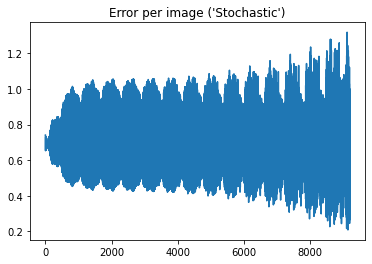

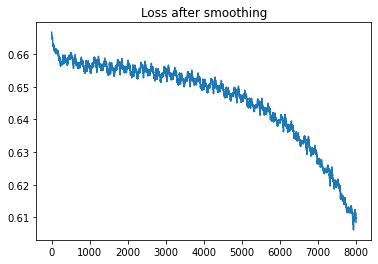

In [ ]:
plt.plot(Recorded_loss)
plt.title("Error per image ('Stochastic')")

val = 1200
Avg_loss = []
for i in range(len(Recorded_loss)-val):
    Avg_loss +=  [np.mean(Recorded_loss[i:i+val])]

plt.figure()
plt.title("Loss after smoothing")
plt.plot(Avg_loss)

In [ ]:
#Display confusion Matrix

prediction = []
test_set = x_test[0:50]

for Input_img in tqdm.tqdm(test_set,total = len(test_set)):
    outputs = [Input_img]
    for i in range(n_layers):
        out = Model[i].forward(outputs[-1])
        outputs += [out.copy()]
    prediction += [np.argmax(out)]
    
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(prediction, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

  0%|          | 0/50 [00:00<?, ?it/s]

Predicted,0
Actual,
0,33
1,17


Keras Implementation

In [ ]:
model_2 = Sequential()
model_2.add(Dense(50, activation='tanh', input_shape=(8,)))
model_2.add(Dense(40, activation='tanh'))
model_2.add(Dense(30, activation='tanh'))
model_2.add(Dense(20, activation='tanh'))
model_2.add(Dense(10, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
model_2.build()
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                450       
                                                                 
 dense_4 (Dense)             (None, 40)                2040      
                                                                 
 dense_5 (Dense)             (None, 30)                1230      
                                                                 
 dense_6 (Dense)             (None, 20)                620       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4,561
Trainable params: 4,561
Non-traina

In [ ]:
model_2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)

In [ ]:
model_2.fit(x= x_train,y= y_train, batch_size=1, epochs=epochs, verbose=0,callbacks=[TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [ ]:
predicted = model_2.predict(x_test)
prediction = np.argmax(predicted, axis=1)

In [ ]:
#Display confusion Matrix
    
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(prediction, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0
Actual,
0,110
1,44


Q. 4. Build a  CNN model from scratch (using Numpy) to recognize human emotion using Facial emotion recognition dataset (FER2013) (https://github.com/gitshanks/fer2013) (split dataset into training dataset (80%) and  testing dataset (20%) ). For implementation, use a  Adam gradient descent algorithm to learn model with parameters for α = 0.01 and random parameters of the CNN model for the Softmax loss function 
(i) Visualize Facial emotion recognition dataset (FER2013).  
(ii) Plot a comparative loss curve for at least 50 epochs.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/fer2013.csv')

print("List of emotions: ",data['emotion'].unique())
data.head()

List of emotions:  [0 2 4 6 3 5 1]


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
#Function to prepare data
def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label array """
    
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

#Prepare data
x,y = prepare_data(data)
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size =0.2)

print(np.shape(x_train),np.shape(y_train))

(28709, 48, 48) (28709,)


<Figure size 432x288 with 0 Axes>

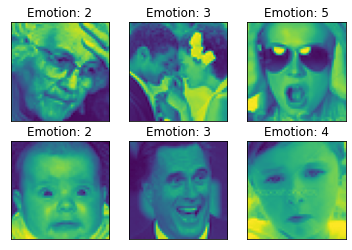

In [ ]:
#Visualize Facial emotion recognition dataset

plt.figure()
fig, ax = plt.subplots()

for i in range(6):
    plt.subplot(2,3,i+1)
    t= np.random.randint(28709)
    plt.title("Emotion: {}".format(y_train[t]))
    plt.imshow(x_train[t])

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

In [ ]:
Model = [] #Input = 1*32*32

#Layer 0
Model = Model + [conv2d_layer((1,5,5),6)] #Out = 6*28*28

#Layer 1
Model = Model + [tanh()] #Out = 6*28*28

#Layer 2
Model = Model + [AveragePooling2D((2,2),2)] # Out = 6*14*14

#Layer 3
Model = Model + [conv2d_layer((6,5,5),16)] #Out = 16*10*10

#Layer 4
Model = Model + [tanh()] #Out = 16*10*10

#Layer 5
Model = Model + [AveragePooling2D((2,2),2)]# Out = 16*5*5

#Layer 6
Model = Model + [conv2d_layer((16,5,5),120)] #Out = 120*1*1

#Layer 7
Model = Model + [tanh()] #Out = 120*1*1

#Layer 8
Model = Model + [flatten()] #Out = 120

#Layer 9
Model = Model + [fully_connected(120,84)] #Out = 84

#Layer 10
Model = Model + [tanh()] #Out = 84

#Layer 11
Model = Model + [fully_connected(84,7)] #Out = 10

#Layer 12
Model = Model + [softmax()] #Out = 10

In [ ]:
epochs = 5
Recorded_loss = []
Learning_rate = 0.01

x_train = x_train[:50]
y_train = y_train[:50]

n_layers = len(Model)
for ep in tqdm.tqdm(range(epochs),leave=True,desc = "Epochs"):
    
    Data = tqdm.tqdm(zip(x_train,y_train),total = len(y_train),leave=False,desc = "Images")
    
    for Input_img,truth in Data:
        
        truth_onehot = np.array([0]*7)
        truth_onehot[truth] = 1
        
        outputs = [cv2.resize(Input_img,(32,32))]

        for i in range(n_layers):
            out = Model[i].forward(outputs[-1])
            outputs += [out.copy()]
            
    
        Loss, error = SoftmaxLoss(truth_onehot,outputs[-1])
        error = error * Learning_rate
        Recorded_loss += [Loss] 
        
        Data.set_description("Current loss is: {}".format(np.round(Loss,5)))
        Data.refresh()
        
        error = [error]
        for i in range(n_layers-1,-1,-1):
            out = Model[i].reverse(outputs[i],error[-1])
            error += [out.copy()]
            
        error.reverse()
    
    Data.set_description("Completed")
    Data.refresh()

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Images:   0%|          | 0/50 [00:00<?, ?it/s]

Images:   0%|          | 0/50 [00:00<?, ?it/s]

Images:   0%|          | 0/50 [00:00<?, ?it/s]

Images:   0%|          | 0/50 [00:00<?, ?it/s]

Images:   0%|          | 0/50 [00:00<?, ?it/s]

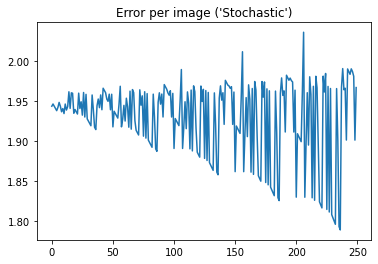

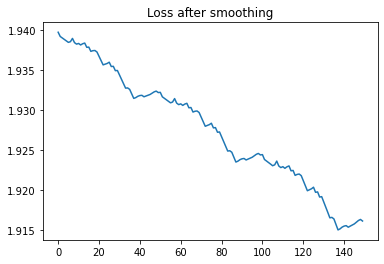

In [ ]:
plt.plot(Recorded_loss)
plt.title("Error per image ('Stochastic')")

val = 100
Avg_loss = []
for i in range(len(Recorded_loss)-val):
    Avg_loss +=  [np.mean(Recorded_loss[i:i+val])]

plt.figure()
plt.title("Loss after smoothing")
plt.plot(Avg_loss)

In [ ]:
#Display confusion Matrix

prediction = []
test_set = x_test[0:50]

for Input_img in tqdm.tqdm(test_set,total = len(test_set)):
    outputs = [cv2.resize(Input_img,(32,32))]
    for i in range(n_layers):
        out = Model[i].forward(outputs[-1])
        outputs += [out.copy()]
    prediction += [np.argmax(out)]
    
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(prediction, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

  0%|          | 0/50 [00:00<?, ?it/s]

Predicted,3
Actual,
0,9
2,8
3,8
4,9
5,6
6,10
